    # Default Perturbation network analysis notebook
    This notebook was automatically generated using freenrgworkflows
    Author: Antonia Mey
    Email: antonia.mey@ed.ac.uk

In [1]:
    %pylab inline
    import networkanalysis.networkanalysis as n_graph
    import networkanalysis.plotting as n_plot
    import networkanalysis.experiments as n_ex
    import networkanalysis.stats as n_stats
    import networkanalysis
    networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


'1.2.0'

In [2]:
    # Creating and populating the perturbation network
    pG = n_graph.PerturbationGraph()
    # Change the path below to the csv file containing the individual perturbations
    pG.populate_pert_graph('sars/sarscov2-3toR.csv')
    # Uncomment below if you have run multiple runs for some perturbations and add file path
    #pG.add_data_to_graph('/path/to/additional/runs.csv')
    target_compound = pG.compoundList[0] #change this to your target compound
    pG.compute_weighted_avg_paths(target_compound)
    pG.format_free_energies(merge_BM=True,intermed_ID='INT')
    computed_relative_DDGs = pG.freeEnergyInKcal
    print ("Free energies computed from the perturbation network are: ")
    print ("---------------------------------------- ")
    pG.write_free_energies(computed_relative_DDGs)

mat compounds ['10' '11' '12' '13' '14' '16' '17' '18' '19' '20' '21' '24' '25']
paths 10 11
[['10', '11']]
path weights [1.]
sum_list [-0.83698325]
paths 10 12
[['10', '11', '12'], ['10', '11', '25', '12']]
path weights [0.68396526 0.31603474]
sum_list [-0.6799324999999999, -1.13770325]
paths 10 13
[['10', '13'], ['10', '24', '13']]
path weights [0.66086997 0.33913003]
sum_list [-0.21597, -1.19112425]
paths 10 14
[['10', '14']]
path weights [1.]
sum_list [-1.377996]
paths 10 16
[['10', '14', '16'], ['10', '14', '17', '16']]
path weights [0.78517222 0.21482778]
sum_list [-2.324595, -2.41243425]
paths 10 17
[['10', '14', '17'], ['10', '14', '16', '17']]
path weights [0.85347917 0.14652083]
sum_list [-1.84871475, -1.7608755]
paths 10 18
[['10', '14', '17', '18'], ['10', '14', '16', '17', '18']]
path weights [0.78118606 0.21881394]
sum_list [-2.21980675, -2.1319675]
paths 10 19
[['10', '14', '17', '18', '19'], ['10', '14', '16', '17', '18', '19'], ['10', '14', '17', '18', '20', '19'], ['1

<ipython-input-2-89f9da757f69>:2: DeprecationWarning: PerturbationGraph is deprecated use the NetworkAnnalyser class instead.
  pG = n_graph.PerturbationGraph()



    ### Experimental data
    It is useful to compare computed free energies to experimental data.
    The cells below will read in your experimental data. Just replace the path to you IC50 data in the
    `IC_50_file` variable 

In [3]:
    experiments = n_ex.ExperimentalData()
    IC_50_file = 'sars/sarscov2_ic50_exp.csv'
    experiments.compute_DDG_from_IC50s(IC_50_file, reference=target_compound)
    experimental_DDGs = experiments.freeEnergiesInKcal
    print ("Free energies computed from IC50 data: ")
    print ("---------------------------------------- ")
    pG.write_free_energies(experimental_DDGs)

ref 10
mat keys ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']
Free energies computed from IC50 data: 
---------------------------------------- 
#FREE ENERGIES ARE:
1          2.970 +/- 0.413
2          1.263 +/- 0.413
3          0.996 +/- 0.413
4          0.721 +/- 0.413
5          -1.281 +/- 0.413
6          -0.559 +/- 0.413
7          -0.868 +/- 0.413
8          -0.510 +/- 0.413
9          0.908 +/- 0.413
10         0.000 +/- 0.413
11         -1.373 +/- 0.413
12         -0.935 +/- 0.413
13         -1.099 +/- 0.413
14         -1.334 +/- 0.413
15         -1.425 +/- 0.413
16         -1.481 +/- 0.413
17         -1.425 +/- 0.413
18         -2.332 +/- 0.413
19         -2.074 +/- 0.413
20         -2.090 +/- 0.413
21         -2.504 +/- 0.413
22         -2.090 +/- 0.413
23         -2.441 +/- 0.413
24         -2.074 +/- 0.413
25         -2.308 +/- 0.413
26         -1.165 +/- 0.413
27    

<ipython-input-3-1db586f4d278>:3: DeprecationWarning: compute_DDG_from_IC50s is deprecated use compute_affinites instead.
  experiments.compute_DDG_from_IC50s(IC_50_file, reference=target_compound)



    ### Typical plots
    Below a bar plot and scatter plot template for comparing experimental and computed free energy values

['10' '11' '12' '13' '14' '16' '17' '18' '19' '20' '21' '24' '25']


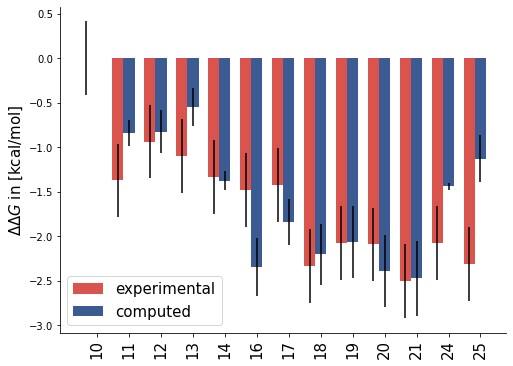

In [4]:
    plotter = n_plot.FreeEnergyPlotter(experimental_DDGs, computed_relative_DDGs)
    ax,fig = plotter.plot_bar_plot(legend=('experimental', 'computed'))

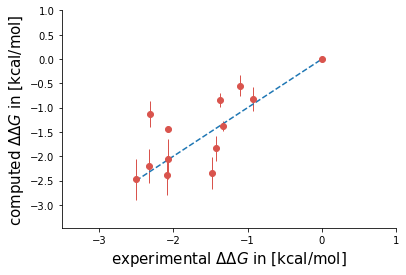

In [5]:
    plotter.plot_scatter_plot() 


    ### Error analysis on typical statistical measures: R_mean, MUE and Kendall tau_mean
    Below are examples of how to re-sample from the data in order to obtain error bars on correlation coefficients,
    mean unsigned errors and Kendall tau. Returned are confidence intervals of 65% and the median of the distribution.
     However, standard deviations and mean can also
    be returned, though less likely to give good information as these distributions are often heavily skewed and not
    normally distributed. 

In [6]:
    stats = n_stats.freeEnergyStats()
    stats.generate_statistics(computed_relative_DDGs,experimental_DDGs,repeats=10000)
    r_confidence = stats.R_confidence
    tau_confidence = stats.tau_confidence
    mue_confidence = stats.mue_confidence
    print ("R confidence is: %.2f < %.2f < %.2f" %(r_confidence[1], r_confidence[0], r_confidence[2]))
    print ("Mue confidence is: %.2f < %.2f < %.2f" %(mue_confidence[1], mue_confidence[0], mue_confidence[2]))
    print ("tau confidence is: %.2f < %.2f < %.2f" %(tau_confidence[1], tau_confidence[0], tau_confidence[2]))

R confidence is: 0.70 < 0.73 < 0.76
Mue confidence is: 0.42 < 0.45 < 0.48
tau confidence is: 0.53 < 0.58 < 0.61
